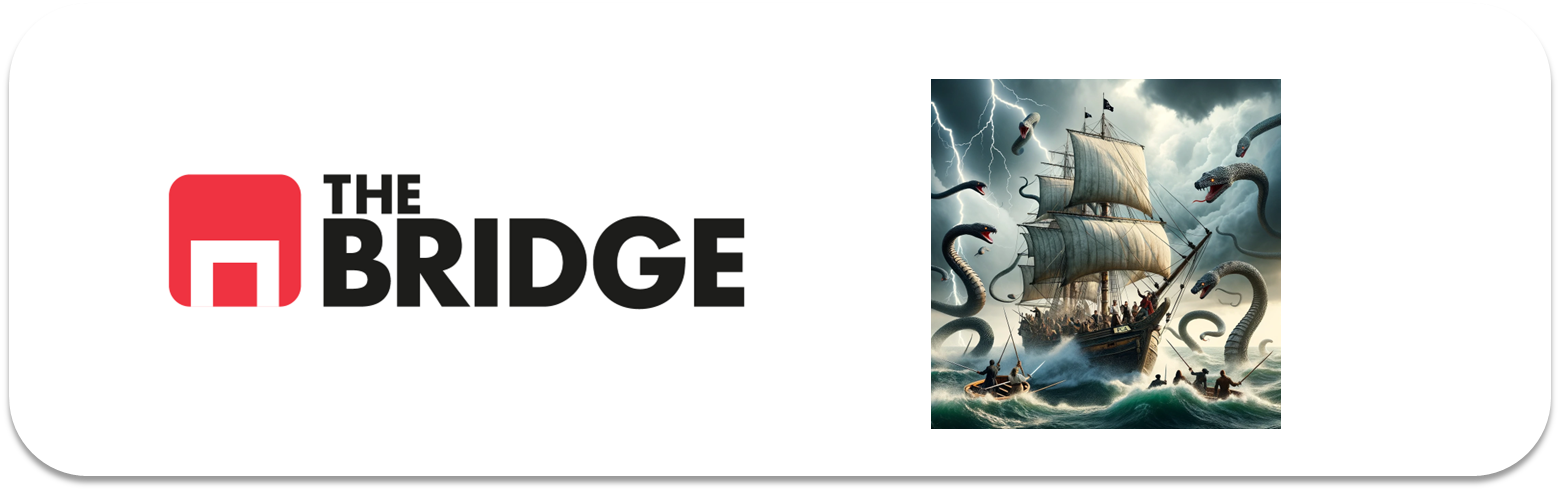

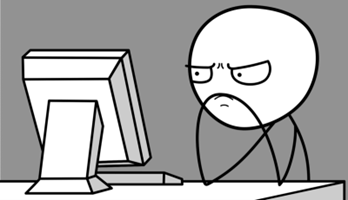

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt
from toolbox_ML import *

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [2]:
df = pd.read_csv("./data/breastcancer-winsconsin.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Mostrar proporciones de valores únicos para cada columna categórica
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Proporciones en la columna '{column}':")
        print(df[column].value_counts(normalize=True))
        print("\n")


Proporciones en la columna 'diagnosis':
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64




In [5]:
tipifica_variables(df,10,20)

,nombre_variable,tipo_sugerido
0,id,Numérica Continua
1,diagnosis,Binaria
2,radius_mean,Numérica Continua
3,texture_mean,Numérica Continua
4,perimeter_mean,Numérica Continua
5,area_mean,Numérica Continua
6,smoothness_mean,Numérica Continua
7,compactness_mean,Numérica Continua
8,concavity_mean,Numérica Continua
9,concave points_mean,Numérica Continua


In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Revisando:
* Radius mean puede ser interesante mantener
* Texture mean puede ser interesante mantener quizás tenga relación con radius y con texture worst.
* Perimeter mean puede ser interesante mantener
* Area mean puede ser interesante mantener
* smoothness mean tiene una desv est muy baja, podría eliminarse porque es una feature bastante uniforme.
* Radius mean puede ser interesante mantener
* Compactness mean tiene una desv est muy baja, podría eliminarse porque es una feature bastante uniforme.
* Concavity mean tiene una desv est muy baja, podría eliminarse porque es una feature bastante uniforme.
* Concave points mean tiene una desv est muy baja, podría eliminarse porque es una feature bastante uniforme.
* Symmetry mean tiene una desv est muy baja, podría eliminarse porque es una feature bastante uniforme.
* Texture worst mean puede ser interesante mantener 
* Perimeter worst mean puede ser interesante mantener aunque también está perimeter worst.


### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

ID no aporta

In [7]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)


In [8]:
target = 'diagnosis'

In [9]:
# Obtén los tipos de datos de cada columna
tipos_de_datos = df.dtypes

col_num = []
col_cat = []

# Itera sobre cada columna y clasifícala como numérica o categórica
for columna, tipo in tipos_de_datos.items():
    if pd.api.types.is_numeric_dtype(tipo):
        col_num.append(columna)
    else:
        col_cat.append(columna)

# Imprime las listas de columnas categóricas y numéricas
print(f'Numéricas: {col_num}')
print(f'Categóricas: {col_cat}')

Numéricas: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Categóricas: ['diagnosis']


### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [11]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42) 

In [12]:
# Calcula la correlación entre las columnas numéricas
correlacion_numericas = train_set[col_num].corr()

print("Correlación entre columnas numéricas:")
print(correlacion_numericas)

Correlación entre columnas numéricas:
                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.304231        0.997852   0.986512   
texture_mean                0.304231      1.000000        0.311321   0.297186   
perimeter_mean              0.997852      0.311321        1.000000   0.986063   
area_mean                   0.986512      0.297186        0.986063   1.000000   
smoothness_mean             0.136103      0.009986        0.173230   0.149533   
compactness_mean            0.457127      0.240497        0.509227   0.452539   
concavity_mean              0.654620      0.297140        0.695139   0.666760   
concave points_mean         0.811418      0.296437        0.840800   0.813122   
symmetry_mean               0.162263      0.110906        0.196485   0.162577   
fractal_dimension_mean     -0.357312     -0.075108       -0.309189  -0.323431   
radius_se                   0.672982      0.272766        0.686113   0.

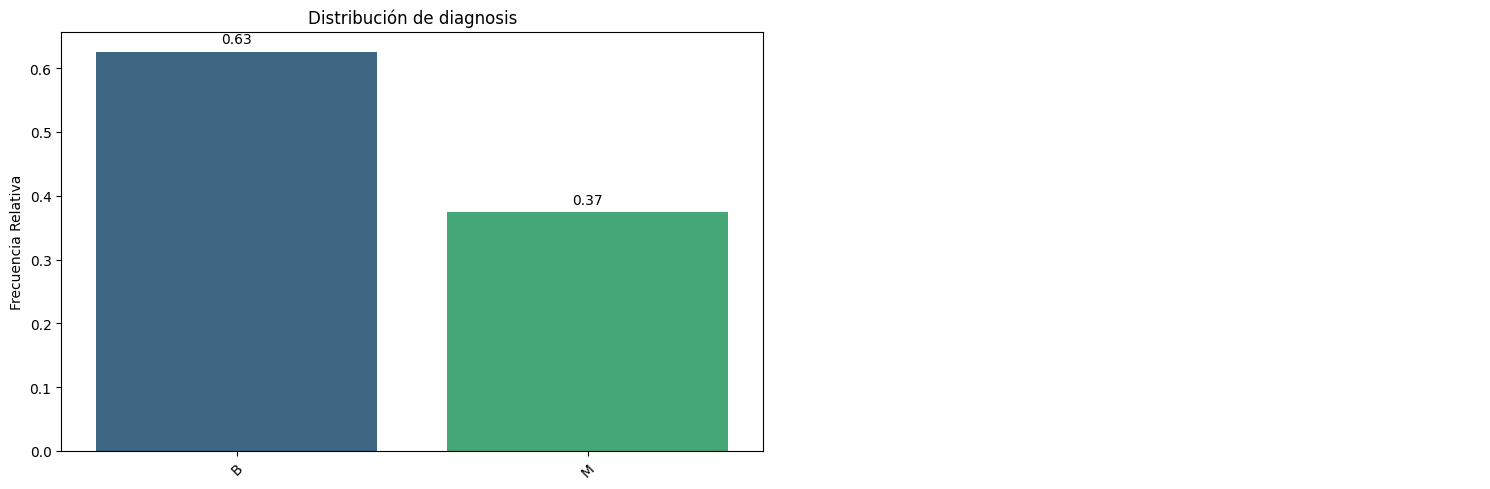

In [128]:
bt.pinta_distribucion_categoricas(train_set, [target], mostrar_valores= True, relativa= True)

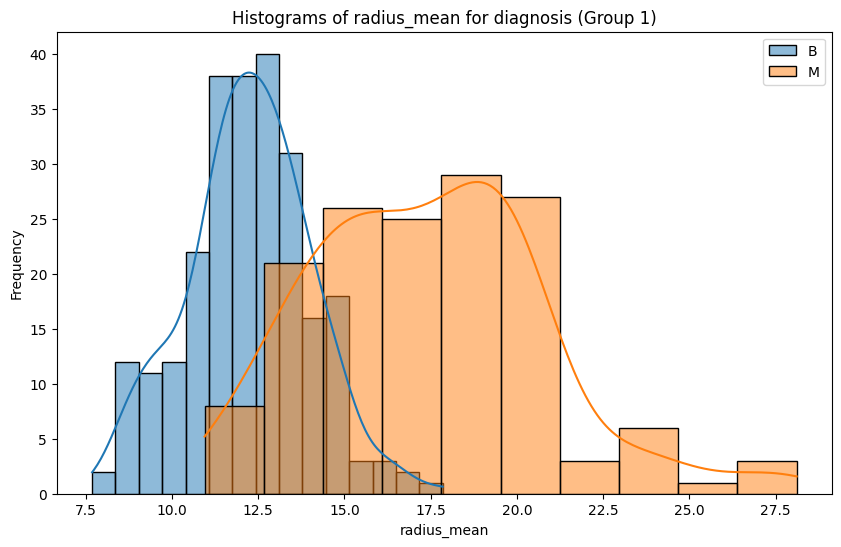

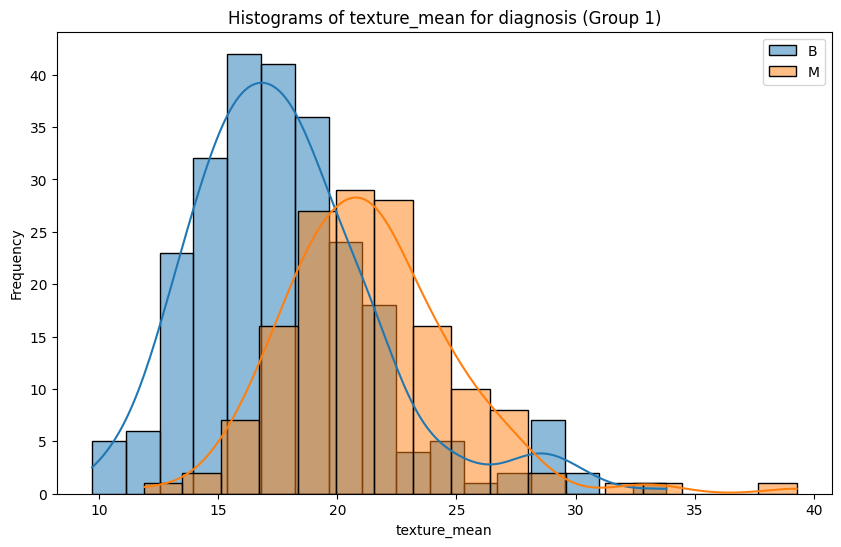

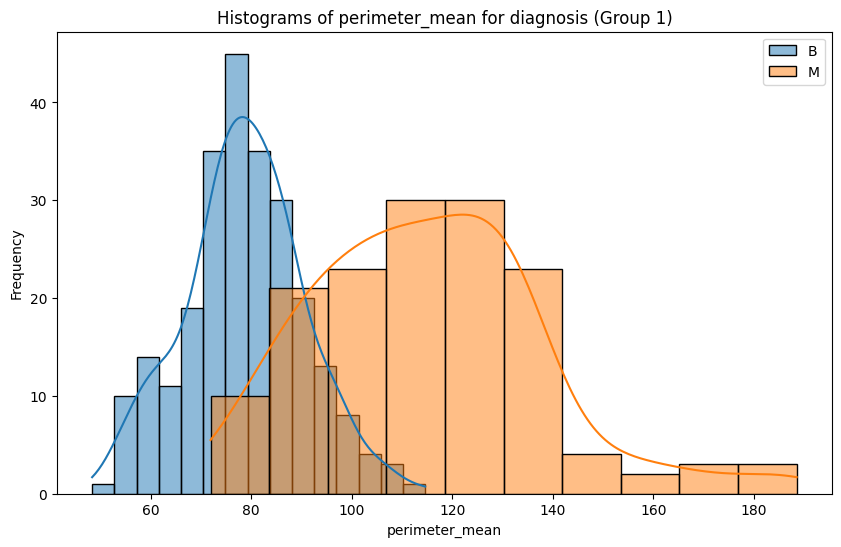

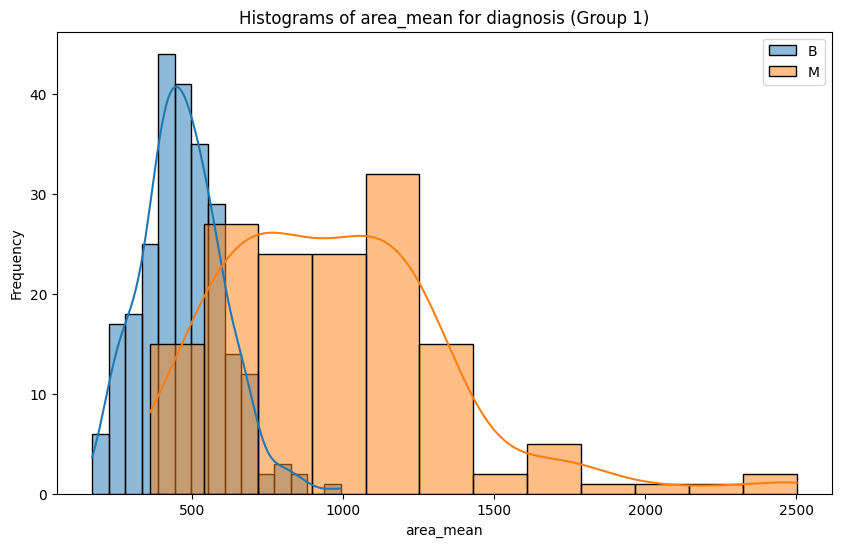

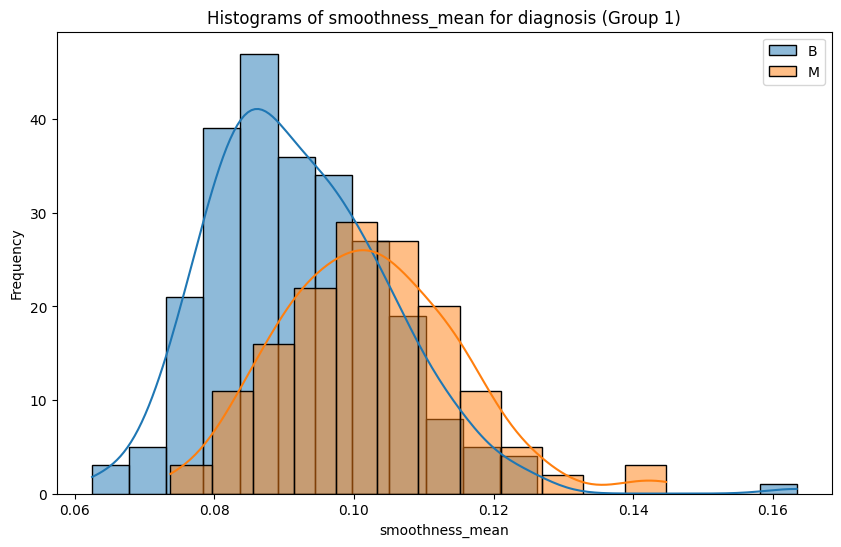

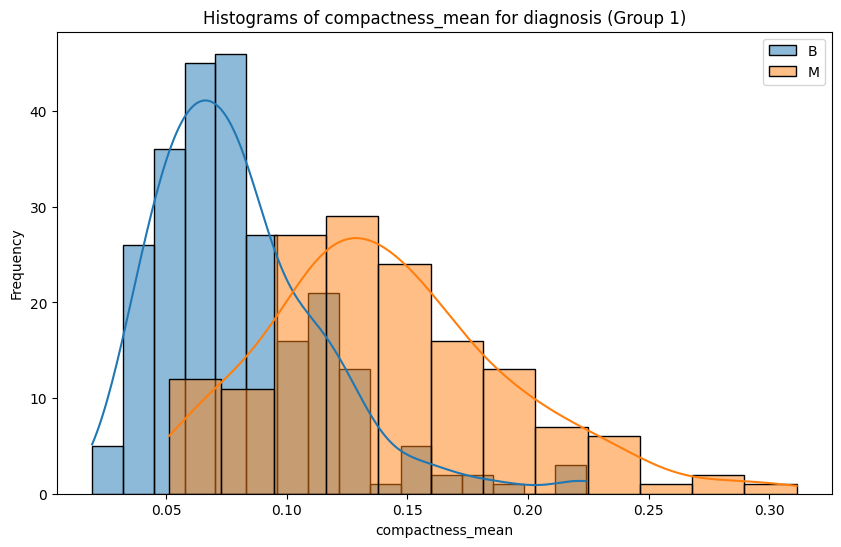

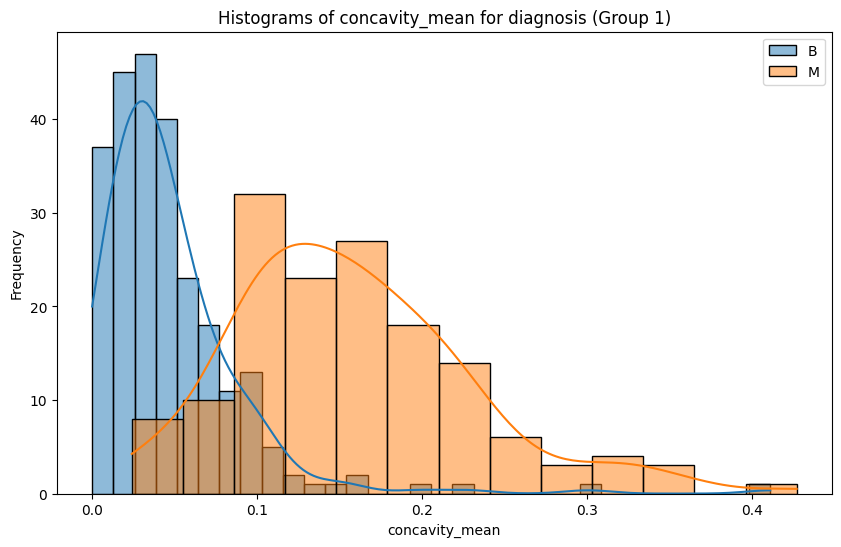

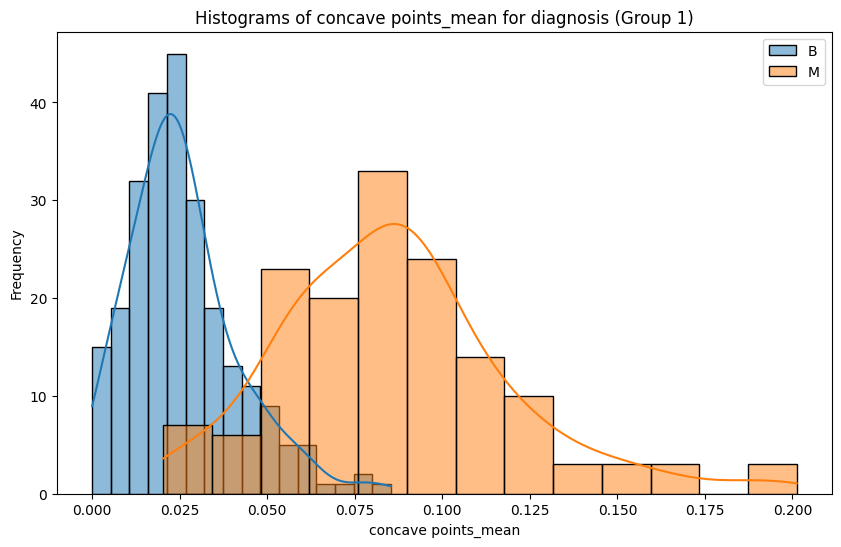

In [129]:
for col in train_set.columns:
    if col != target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

In [14]:
sel1= 'area_mean', 'compactness_mean','concavity_mean','areas_se','radius_worst','perimeter_worst','concavity_worst','concavity_points_worst' 
# concave_points está en el grupo de eliminar por parecido a concavity, pero en el primer análisis mejor añadirla y luego eliminar si hace falta por colinealidad

In [15]:
sel2= 'radius_mean','radius_se', 'perimeter_se','compactness_worst',
#perimeter_se se parece a radious mean la dejamos aquí aunque quizás es para eliminar?

In [16]:
sel3='perimeter_mean','smoothness_mean','symmetry_mean', 'texture_se','smoothness','compactness', 'concave_points','symmety_se','smoothness_worst','symmetry_worst','factal_dimension_se'

In [17]:
descartes= 'concave_points', 'fractal_dimension', 'concavity','fractal_dimension','area_worst'

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

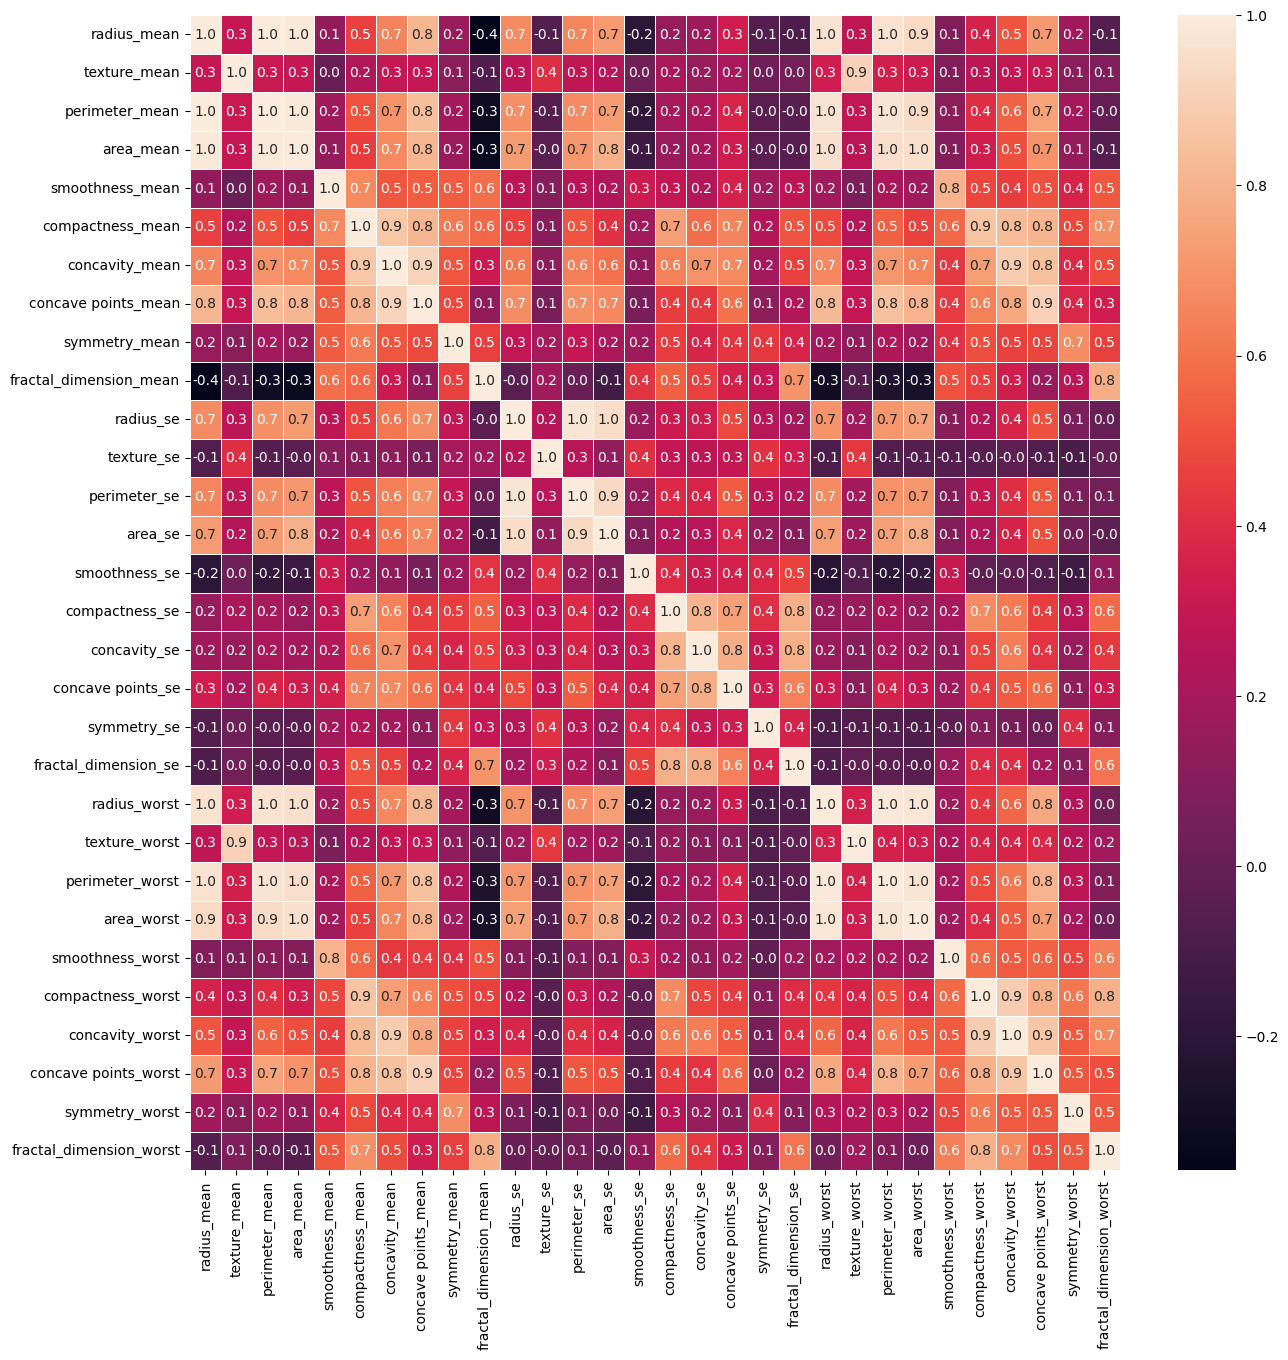

In [ ]:
#correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(train_set.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f');

In [18]:
corr= train_set[col_num].corr()


In [19]:
serie_corr = np.abs(corr[target])


KeyError: 'diagnosis'

In [ ]:
r_minimo = 0.10
features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list()
features_num_sel

NameError: name 'serie_corr' is not defined

In [ ]:
serie_corr.sort_values(ascending = False)

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [20]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]



rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)



baseline = np.mean(cross_val_score(rfc,X_train,y_train, scoring = "balanced_accuracy", cv = 5))
print(f"Baseline: {baseline}%")
 

Baseline: 0.9387919305653296%


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

In [22]:
features_visual = [col for col in train_set.columns if col not in descartes]


In [24]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se',
             'texture_worst','area_worst', 'area_se', 'concavity_mean',
             'fractal_dimension_mean','smoothness_mean']

features_visual_final  = [col for col in features_visual if col not in drop_list]

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [29]:
#Train test split
X_train_visual = X_train[features_visual_final]

rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)



baseline = np.mean(cross_val_score(rfc,X_train,y_train, scoring = "balanced_accuracy", cv = 5))
print(f"Baseline: {baseline}%")

#Random Forest Classifier
rfc_1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

visual_score = np.mean(cross_val_score(rfc_1, X_train_visual, y_train, scoring= "balanced_accuracy",cv = 5))
print("visual escore")
visual_score

KeyError: "['diagnosis'] not in index"

### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

num_feats_anova = 5
select_feature = SelectKBest(f_classif, k=num_feats_anova).fit(X_train, y_train)

In [31]:
best_features_sorted = pd.DataFrame({'Feature': X_train.columns, 'Score': select_feature.scores_}).sort_values(by='Score', ascending=False)
features_anova = select_feature.get_feature_names_out()
best_features_sorted.head()


,Feature,Score
27,concave points_worst,662.320337
7,concave points_mean,616.646516
22,perimeter_worst,580.041174
20,radius_worst,547.254347
2,perimeter_mean,443.061554


In [32]:
sel1

('area_mean',
 'compactness_mean',
 'concavity_mean',
 'areas_se',
 'radius_worst',
 'perimeter_worst',
 'concavity_worst',
 'concavity_points_worst')

In [34]:
# Transformar el dataset a solo las 5 mejores características
X_train_anova = select_feature.transform(X_train)


#Random Forest Classifier
rfc_2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

anova_score = np.mean(cross_val_score(rfc_1, X_train_anova, y_train, cv = 5, scoring= "balanced_accuracy"))

print(f"ANOVA: {anova_score*100.0}%/{num_feats_anova} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

NameError: name 'rfc_1' is not defined

### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [33]:
# Transformar el dataset a solo las 5 mejores características
X_train_anova = select_feature.transform(X_train)


#Random Forest Classifier
rfc_2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

anova_score = np.mean(cross_val_score(rfc_1, X_train_anova, y_train, cv = 5, scoring= "balanced_accuracy"))

print(f"ANOVA: {anova_score*100.0}%/{num_feats_anova} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

NameError: name 'rfc_1' is not defined

### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [35]:
from sklearn.feature_selection import RFE

#Random Forest Classifier
rfc_3 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

#Recursive Feature Elimination y entrenar el modelo
num_feats_rfe = 5
rfe = RFE(estimator=rfc_3, n_features_to_select= num_feats_rfe, step=1)
rfe = rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)

rfe_score = np.mean(cross_val_score(rfc_3, X_train_rfe, y_train, cv = 5, scoring= "balanced_accuracy"))

print(f"ANOVA: {rfe_score*100.0}%/{num_feats_anova} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

NameError: name 'num_feats_baseline' is not defined

### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.